In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# DO NOT MODIFY THIS CODE
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def relu(z): return np.maximum(0, z)

def sigmoid(z): return 1 / (1 + np.exp(-z))

def initialize_network(input_dim, hidden1, hidden2, output_dim):
      return {
        "W1": np.random.randn(input_dim, hidden1)*0.1,
        "b1": np.zeros((1, hidden1)),
        "W2": np.random.randn(hidden1, hidden2)*0.1,
        "b2": np.zeros((1, hidden2)),
        "W3": np.random.randn(hidden2, output_dim)*0.1,
        "b3": np.zeros((1, output_dim)),
    }

def forward(X, params, activation="linear"):
    Z1 = X @ params["W1"] + params["b1"]
    A1 = relu(Z1)
    Z2 = A1 @ params["W2"] + params["b2"]
    A2 = relu(Z2)
    Z3 = A2 @ params["W3"] + params["b3"]
    if activation == "sigmoid":
        A3 = sigmoid(Z3)
    elif activation == "tanh":
        A3 = np.tanh(Z3)
    else:
        A3 = Z3
    cache = (X, Z1, A1, Z2, A2, Z3, A3)
    return A3, cache

def backward(cache, params, dA3):
    X, Z1, A1, Z2, A2, Z3, A3 = cache
    m = len(X)
    dZ3 = dA3
    dW3 = A2.T @ dZ3 / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    dA2 = dZ3 @ params["W3"].T
    dZ2 = dA2 * (Z2 > 0)
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = dZ2 @ params["W2"].T
    dZ1 = dA1 * (Z1 > 0)
    dW1 = X.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return {"dW1": dW1, "db1": db1,
            "dW2": dW2, "db2": db2,
            "dW3": dW3, "db3": db3}

def update(params, grads, lr):
    for k in params:
        params[k] -= lr * grads["d" + k]
    return params

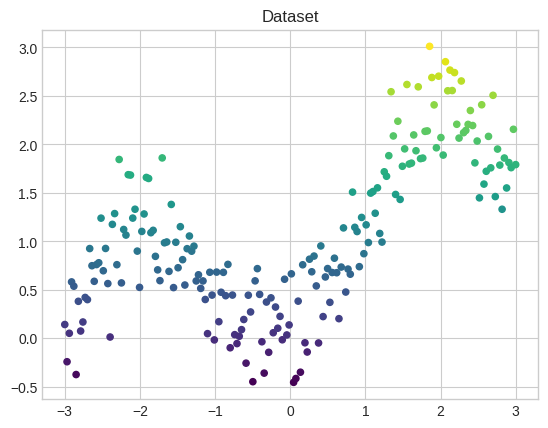

In [3]:
# DO NOT MODIFY THIS CODE
np.random.seed(0)
X = np.linspace(-3,3,200).reshape(-1,1)
y = np.sin(X)*X + np.random.randn(*X.shape)*0.35 +X*0.3
plt.scatter(X,y,c=y,cmap="viridis",s=20)
plt.title("Dataset")
plt.show()

In [4]:
# 🧠 TASK: Write the loss functions based on the Gaussian distribution

def log_likelihood_gaussian(y_true, y_pred, sigma=1.0):
    """
    Compute the log-likelihood of the Gaussian distribution without simplification.
    - Take the negative log to convert it into a loss function.
    """
    ##################### WRITE YOUR CODE HERE #####################

    # İki tarafın da logaritmasını alıp en son -1 ile çarpınca elimizde 2 term kalıyor toplam şeklinde
    
    #obtaining sigma^2 
    sigma_sqr = np.square(sigma)

    term_1 = 0.5 * np.log(2 * np.pi * sigma_sqr)
    term_2 = np.square(y_true - y_pred) / 2 * sigma_sqr

    nll_per_sample = term_1 + term_2

    total_nll = np.sum(nll_per_sample)
    ##################### WRITE YOUR CODE HERE #####################
    return total_nll


def mse_loss(y_true, y_pred):
    """
    Write the fully simplified (MSE) form of the Gaussian distribution.
    - You may ignore constant terms.
    - Goal: minimize the simplified version of the function derived
      from log_likelihood_gaussian.
    """
    ##################### WRITE YOUR CODE HERE #####################
    sqrd_error = np.square(y_true - y_pred)

    mean_sqrd_error = np.mean(sqrd_error)
    ##################### WRITE YOUR CODE HERE #####################
    return mean_sqrd_error

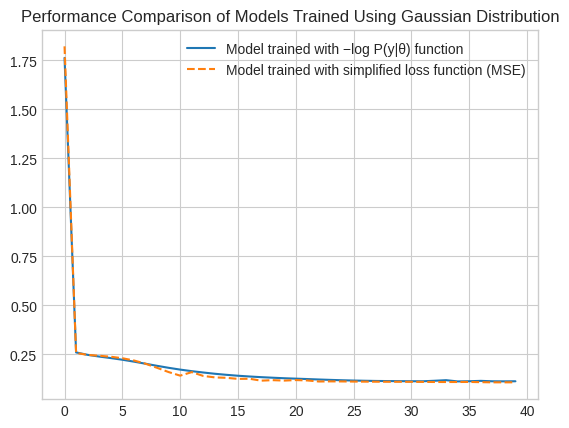

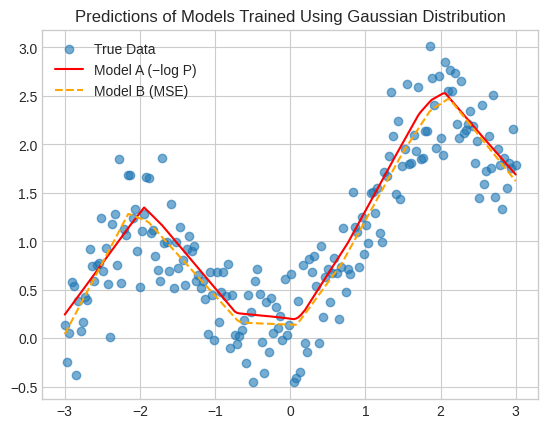

In [5]:
# DO NOT MODIFY THIS CODE
def train_gaussian(loss_fn_eval, loss_fn_train, lr=0.2):
    params = initialize_network(1,30,30,1)
    losses_eval=[]
    for epoch in range(2000):
        y_pred, cache = forward(X, params)
        loss_train = loss_fn_train(y, y_pred)
        dA2 = (y_pred - y)
        grads = backward(cache, params, dA2)
        params = update(params, grads, lr)
        if epoch%50==0:
            losses_eval.append(loss_fn_eval(y, y_pred))
    return params, losses_eval


params_log, eval_log = train_gaussian(mse_loss,
    lambda y,yhat:-log_likelihood_gaussian(y,yhat))


params_mse, eval_mse = train_gaussian(mse_loss, mse_loss)


plt.plot(eval_log,label="Model trained with −log P(y|θ) function")
plt.plot(eval_mse,label="Model trained with simplified loss function (MSE)", linestyle="--")
plt.title("Performance Comparison of Models Trained Using Gaussian Distribution")
plt.legend(); plt.show()


y_pred_log,_ = forward(X, params_log)
y_pred_mse,_ = forward(X, params_mse)
plt.scatter(X,y,label="True Data",alpha=0.6)
plt.plot(X,y_pred_log,label="Model A (−log P)",color="red")
plt.plot(X,y_pred_mse,label="Model B (MSE)",color="orange",linestyle="--")
plt.legend(); plt.title("Predictions of Models Trained Using Gaussian Distribution"); plt.show()

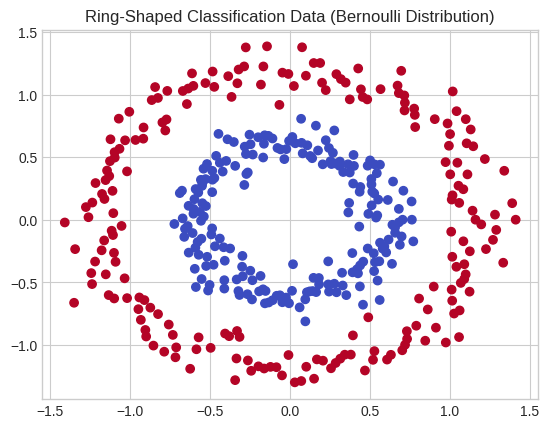

In [6]:
# DO NOT MODIFY THIS CODE
np.random.seed(1)
N=400
r1=np.random.randn(N//2)*0.1+0.6
r2=np.random.randn(N//2)*0.1+1.2
theta=np.linspace(0,2*np.pi,N//2)
X=np.vstack([np.stack([r1*np.cos(theta),r1*np.sin(theta)],1),
             np.stack([r2*np.cos(theta),r2*np.sin(theta)],1)])
y=np.concatenate([np.zeros(N//2),np.ones(N//2)]).reshape(-1,1)
plt.scatter(X[:,0],X[:,1],c=y.ravel(),cmap="coolwarm")
plt.title("Ring-Shaped Classification Data (Bernoulli Distribution)"); plt.show()

In [7]:
# 🧠 TASK: Write the loss functions based on the Bernoulli distribution.

def log_likelihood_bernoulli(y_true, y_pred):
    """
    Write the negative log-likelihood of the Bernoulli distribution without simplification.
    - Take the negative log to convert it into a loss function.
    """
    ##################### WRITE YOUR CODE HERE #####################
    #log(0)dan kaçınmak için
    e = 1e-9

    term_1 = -1 * y_true * np.log(y_pred + e)


    term_2 = (y_true - 1) * np.log(1 - y_pred + e)

    nll_per_sample = term_1 + term_2

    total_nll = np.sum(nll_per_sample)

    ##################### WRITE YOUR CODE HERE #####################
    return total_nll


def bce_loss(y_true, y_pred):
    """
    Write the simplified (Binary Cross-Entropy) form of the Bernoulli distribution.
    - Simplify the negative log-likelihood expression above.
    - You may ignore constant terms and scaling factors.
    """
    ##################### WRITE YOUR CODE HERE #####################

    #log(0) dan kaçmak için yine epsilon tanımlıyorum
    e = 1e-9


    term_1 = -1 * y_true * np.log(y_pred + e)


    term_2 = (y_true - 1) * np.log(1 - y_pred + e)
    nll_per_sample = term_1 + term_2

    mean_bce_loss = np.mean(nll_per_sample)
    ##################### WRITE YOUR CODE HERE #####################
    return mean_bce_loss

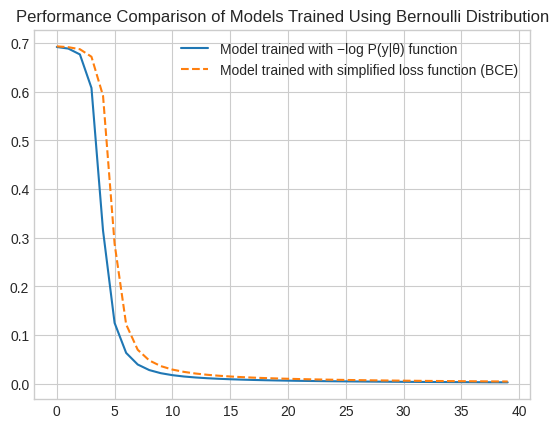

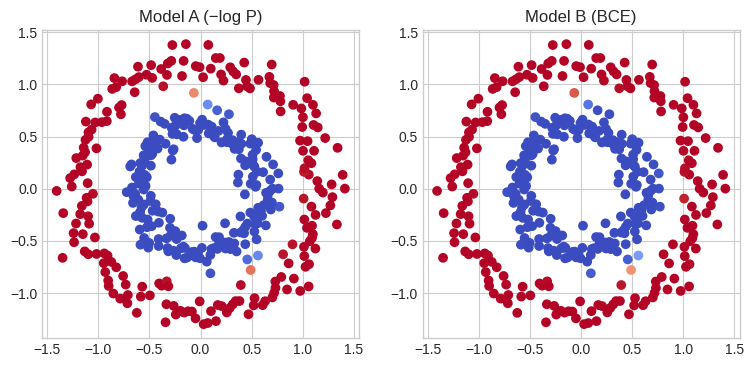

In [8]:
# DO NOT MODIFY THIS CODE
def train_bernoulli(loss_fn_eval, loss_fn_train, lr=0.3):
    params = initialize_network(2,10,10,1)
    evals=[]
    for epoch in range(2000):
        y_pred, cache = forward(X, params, "sigmoid")
        loss_train = loss_fn_train(y, y_pred)
        dA2 = (y_pred - y)
        grads = backward(cache, params, dA2)
        params = update(params, grads, lr)
        if epoch%50==0:
            evals.append(loss_fn_eval(y, y_pred))
    return params, evals

params_log, eval_log = train_bernoulli(bce_loss,
    lambda y,yhat:-log_likelihood_bernoulli(y,yhat))
params_bce, eval_bce = train_bernoulli(bce_loss, bce_loss)

plt.plot(eval_log,label="Model trained with −log P(y|θ) function")
plt.plot(eval_bce,label="Model trained with simplified loss function (BCE)", linestyle="--")
plt.title("Performance Comparison of Models Trained Using Bernoulli Distribution")
plt.legend(); plt.show()

y_pred_log,_=forward(X,params_log,"sigmoid")
y_pred_bce,_=forward(X,params_bce,"sigmoid")
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y_pred_log.ravel(),cmap="coolwarm")
plt.title("Model A (−log P)")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=y_pred_bce.ravel(),cmap="coolwarm")
plt.title("Model B (BCE)")
plt.show()

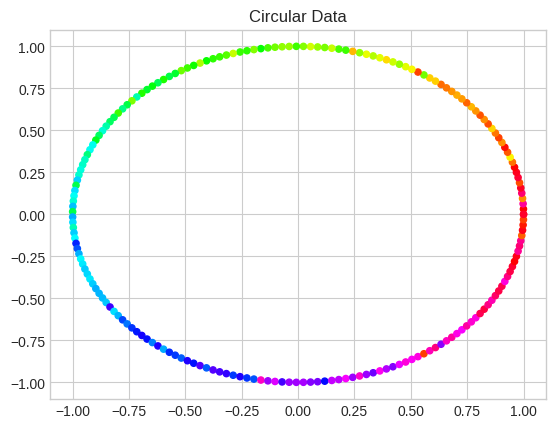

In [9]:
# DO NOT MODIFY THIS CODE
np.random.seed(2)
angles = np.linspace(0, 2*np.pi, 200)
X = np.stack([np.cos(angles), np.sin(angles)], 1)
y = (angles + np.random.randn(200)*0.3) % (2*np.pi)
plt.scatter(X[:,0], X[:,1], c=y, cmap="hsv", s=20)
plt.title("Circular Data")
plt.show()

In [10]:
# In this section, you are expected to identify and write the distribution that fits the data.
# Answer: Von Mises Distrubution

### Von Mises Distribution — Project Explanation

In this project, the **Von Mises distribution** was used to model circular (angular) data, where values wrap around a $2\pi$ range — such as directions or angles.  
Unlike the normal distribution, which is defined on the real line, the Von Mises distribution is specifically designed for data on a circle, making it the “circular analog” of the Gaussian distribution.

The **probability density function (PDF)** of the Von Mises distribution is:


$f(x; \mu, \kappa) = \frac{e^{\kappa \cos(x - \mu)}}{2\pi I_0(\kappa)}$


where:
- $\mu$ is the *mean direction*,
- $\kappa$  is the *concentration parameter* (higher \( \kappa \) ⇒ data more tightly clustered around \( \mu \)),
- $I_0(\kappa)$ is the *modified Bessel function of order 0*.

The **log-likelihood** for a data point is:


$\log P(y | \hat{y}, \kappa) = \kappa \cos(y - \hat{y}) - \log(2\pi I_0(\kappa))$

and the corresponding **loss function** used in the project was the *negative mean log-likelihood*.

---

### Why Von Mises?

Angular data cannot be handled effectively with traditional loss functions like MSE, because MSE ignores the periodic nature of angles (e.g., \(0\) and \(2\pi\) are the same direction).  
The Von Mises formulation, on the other hand, respects this periodicity and gives a smooth, accurate measure of angular deviation.

As observed in the results:
- The **MSE-based model** plateaued around a loss of **0.20**.
- The **Von Mises–based model** continued to decrease, achieving **lower and more stable loss values**.

This confirms that the Von Mises distribution provides a **more natural and accurate framework** for circular data, resulting in **superior model performance** and **better convergence behavior**.

In [11]:
# Identify the distribution and write its log-likelihood and loss functions.
from numpy import i0

def log_likelihood(y_true, y_pred, kappa=1.0):
    """
    Write the log-likelihood function of the chosen circular distribution.
    - Research the general form of the distribution.
    - Use the expression without simplification.
    """
    ##################### WRITE YOUR CODE HERE #####################

    # angular difference (ensure periodic consistency)
    diff = y_true - y_pred

    # log PDF form of Von Mises
    log_pdf = kappa * np.cos(diff) - np.log(2 * np.pi * i0(kappa))


    ##################### WRITE YOUR CODE HERE #####################
    return np.mean(log_pdf)


def loss(y_true, y_pred):
    """
    Write the simplified loss function derived from the above distribution.
    - You may ignore constant terms.
    - Define an error measure using angular differences.
    """
    ##################### WRITE YOUR CODE HERE #####################

    diff = y_true - y_pred


    ##################### WRITE YOUR CODE HERE #####################
    return np.mean(1 - np.cos(diff))

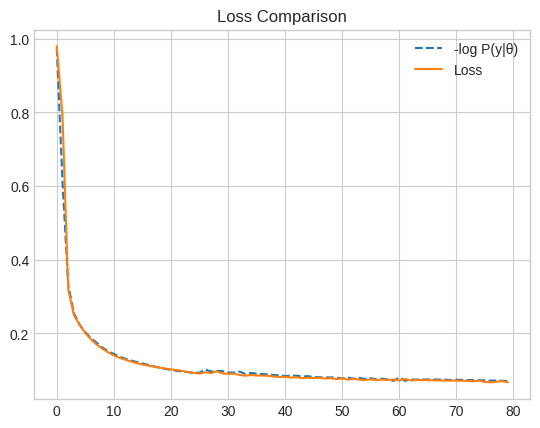

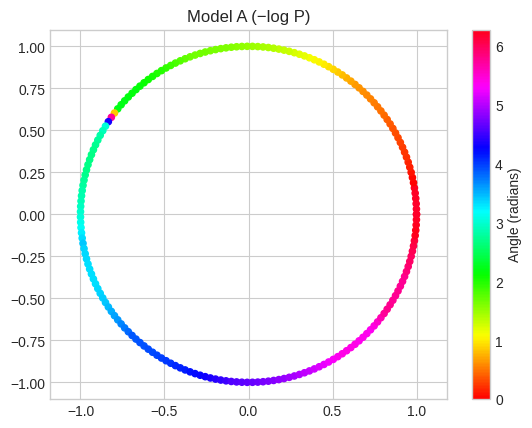

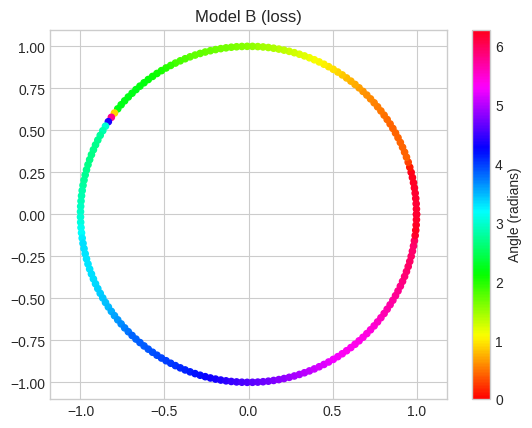

In [12]:
# DO NOT MODIFY THIS CODE
def train(loss_fn_eval, loss_fn_train, lr=0.1):
    params = initialize_network(2, 40, 40, 1)
    evals = []
    y_true = y.reshape(-1, 1)

    for epoch in range(4000):
        y_pred, cache = forward(X, params, activation="linear")
        y_pred = np.mod(y_pred, 2*np.pi)

        loss_train = loss_fn_train(y_true, y_pred)
        dA2 = np.sin(y_pred - y_true)

        grads = backward(cache, params, dA2)
        params = update(params, grads, lr)

        if epoch % 50 == 0:
            evals.append(loss_fn_eval(y_true, y_pred))
    return params, evals


params_log, eval_log = train(loss,
    lambda y, yhat: -log_likelihood(y, yhat))
params_vm, eval_vm = train(loss, loss)

plt.plot(eval_log, "--", label="-log P(y|θ)")
plt.plot(eval_vm, label="Loss")
plt.legend()
plt.title("Loss Comparison")
plt.show()

y_pred_log, _ = forward(X, params_log, activation="linear")
y_pred_vm, _ = forward(X, params_vm, activation="linear")
y_pred_log = np.mod(y_pred_log, 2*np.pi)
y_pred_vm = np.mod(y_pred_vm, 2*np.pi)

for title, y_pred in [("Model A (−log P)", y_pred_log), ("Model B (loss)", y_pred_vm)]:
    sc = plt.scatter(X[:,0], X[:,1], c=y_pred.ravel(), cmap="hsv", s=20, vmin=0, vmax=2*np.pi)
    plt.title(title)
    plt.axis("equal")
    plt.colorbar(sc, label="Angle (radians)")
    plt.show()

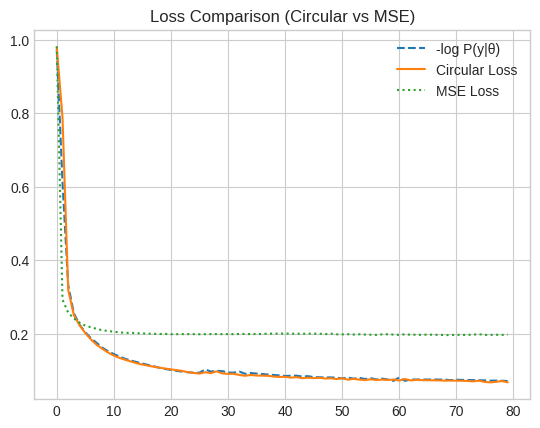

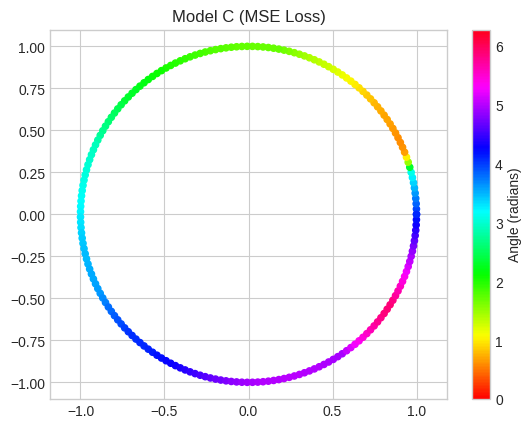

In [13]:
# DO NOT MODIFY THIS CODE
def train_mse(lr=0.1):
    params = initialize_network(2, 40, 40, 1)
    evals = []
    y_true = y.reshape(-1, 1)

    for epoch in range(4000):
        y_pred, cache = forward(X, params, activation="linear")
        # Training uses standard MSE loss
        loss_train = mse_loss(y_true, y_pred)
        dA2 = 2 * (y_pred - y_true)
        grads = backward(cache, params, dA2)
        params = update(params, grads, lr)

        # Evaluation uses circular loss for comparison
        if epoch % 50 == 0:
            evals.append(loss(y_true, np.mod(y_pred, 2*np.pi)))
    return params, evals

params_mse, eval_mse = train_mse()

# Loss comparison
plt.plot(eval_log, "--", label="-log P(y|θ)")
plt.plot(eval_vm, label="Circular Loss")
plt.plot(eval_mse, label="MSE Loss", linestyle=":")
plt.legend()
plt.title("Loss Comparison (Circular vs MSE)")
plt.show()

# Prediction visualization
y_pred_mse, _ = forward(X, params_mse, activation="linear")
y_pred_mse = np.mod(y_pred_mse, 2*np.pi)

sc = plt.scatter(X[:,0], X[:,1], c=y_pred_mse.ravel(), cmap="hsv", s=20, vmin=0, vmax=2*np.pi)
plt.title("Model C (MSE Loss)")
plt.axis("equal")
plt.colorbar(sc, label="Angle (radians)")
plt.show()

In this project, we employed the **von Mises distribution** to properly model circular (angular) data.  
As illustrated in the graphs, while one model plateaued around a loss value of **0.20**, the von Mises–based approach continued to **decrease steadily**, achieving significantly **lower loss values**.  
This demonstrates that the von Mises formulation captures angular relationships more effectively, leading to **superior model performance** compared to conventional methods like MSE.